In [1]:
import numpy as np
import swiftestio as swio
import matplotlib.pyplot as plt
import timeit

In [2]:
workingdir = '/Users/daminton/work/Projects/Swiftest/Pouplin-Mars-Disk/high_high_1500_1/'

In [3]:
def readswifter(inparfile):
    inparfile = workingdir + inparfile
    param = {}
    param = swio.read_swifter_param(inparfile)
    param['BIN_OUT'] = workingdir + param['BIN_OUT']
    ds = swio.swifter2xr(param)
    return ds

In [4]:
def readswiftest(config_file_name):
    config_file_name = workingdir + config_file_name
    config = {}
    config = swio.read_swiftest_config(config_file_name)
    config['BIN_OUT'] = workingdir + config['BIN_OUT']
    ds = swio.swiftest2xr(config)
    ds['Mass'] = ds['Mass'] * config['GU']
    return ds

In [6]:
disk = readswiftest('param.in')

Reading Swiftest file /Users/daminton/work/Projects/Swiftest/Pouplin-Mars-Disk/high_high_1500_1/param.in
Reading frames from file /Users/daminton/work/Projects/Swiftest/Pouplin-Mars-Disk/high_high_1500_1/bin.dat
Concatenating DataArrays
Converting DataArray to Dataset


In [37]:
disk['radmarker'] = disk['Radius'] / 1e3

In [38]:
disk['radmarker'].max()

<xarray.DataArray 'radmarker' ()>
array(15.57630245)

In [39]:
disk['radmarker'].min()

<xarray.DataArray 'radmarker' ()>
array(0.61636858)

In [40]:
disk.isel(time=100)

<xarray.Dataset>
Dimensions:    (id: 36377)
Coordinates:
  * id         (id) float64 2.0 3.0 4.0 5.0 ... 4.488e+04 4.488e+04 4.488e+04
    time       float64 5e+04
Data variables:
    a          (id) float64 9.107e+06 1.067e+07 1.07e+07 ... nan nan nan
    e          (id) float64 0.02124 0.008838 0.009996 0.01385 ... nan nan nan
    inc        (id) float64 0.00185 0.001429 0.001901 0.00661 ... nan nan nan
    capom      (id) float64 5.88 2.229 6.266 0.07718 2.202 ... nan nan nan nan
    omega      (id) float64 2.361 0.9227 4.579 5.007 4.521 ... nan nan nan nan
    capm       (id) float64 5.505 3.797 0.007369 0.159 ... nan nan nan nan
    Mass       (id) float64 6.612e-06 2.119e-06 2.66e-05 ... nan nan nan
    Radius     (id) float64 7.076e+03 4.842e+03 1.125e+04 ... nan nan nan
    radmarker  (id) float64 7.076 4.842 11.25 5.452 7.507 ... nan nan nan nan

(0.0001, 1.0)

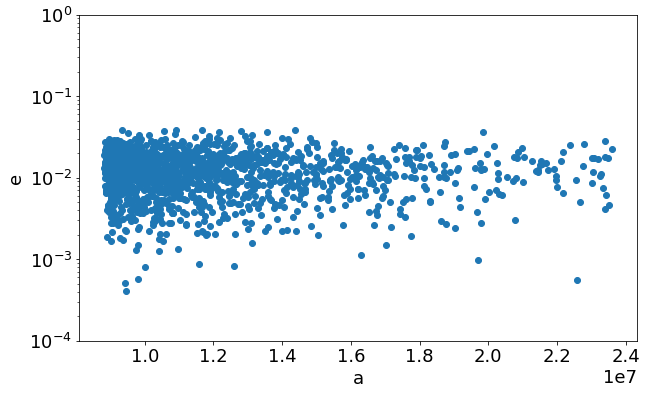

In [42]:
fig = plt.figure(1, figsize=(10,6))
ax = fig.add_subplot(111)
disk.isel(time=0).plot.scatter(x='a', y='e')
plt.rcParams.update({'font.size': 18})
ax.set_yscale('log')
plt.ylim((1e-4,1.0))